In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import pickle
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\Users\anurag\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\anurag\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
df = df.drop(columns=['county', 'lat', 'long', 'posting_date', 'paint_color', 'state', 'image_url', 'description',
                     'id', 'url', 'region', 'region_url'])

In [6]:
df = df.dropna()

In [7]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type
126,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van
127,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van
128,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan
426833,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible


In [8]:
df = df.drop(columns=['VIN'])

In [9]:
df.describe()

,price,year,odometer
count,36325.000000,36325.000000,3.632500e+04
mean,15626.544914,2011.177591,1.075864e+05
std,13438.850726,7.142136,1.114533e+05
min,0.000000,1905.000000,0.000000e+00
25%,6490.000000,2008.000000,6.500000e+04
50%,11995.000000,2013.000000,1.040000e+05
75%,21995.000000,2016.000000,1.415800e+05
max,155000.000000,2022.000000,9.999999e+06


C:\Users\anurag\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


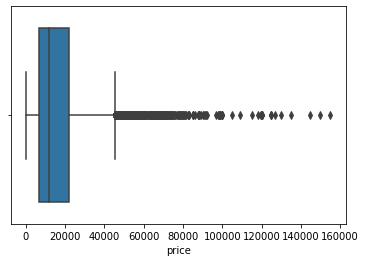

In [10]:
sns.boxplot(df['price'])

In [11]:
Q1 = df['price'].quantile(0.25) #Not needed because the minimum is anyway 0.
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

Q1
upper = Q3 * 1.5 + IQR

Q1
upper

48497.5

In [12]:
df = df.loc[(df['price'] > 6490) & (df['price'] < 48497.5)]
df = df.reset_index(drop=True)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
0,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible
1,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck
2,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,clean,automatic,rwd,full-size,sedan
3,7300,2007.0,lexus,rx350,good,6 cylinders,gas,181000.0,clean,automatic,fwd,mid-size,SUV
4,28900,2017.0,audi,q7,good,6 cylinders,gas,94601.0,clean,automatic,4wd,full-size,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26260,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck
26261,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan
26262,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup
26263,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan


In [13]:
df['year'] = df['year'].astype(int)

In [14]:
#le = LabelEncoder()
#
#cat_features = df[['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive',
#                  'size', 'type']]
#
#df['manufacturer'] = le.fit_transform(df['manufacturer'])
#df['model'] = le.fit_transform(df['model'])
#df['condition'] = le.fit_transform(df['condition'])
#df['cylinders'] = le.fit_transform(df['cylinders'])
#df['fuel'] = le.fit_transform(df['fuel'])
#df['title_status'] = le.fit_transform(df['title_status'])
#df['transmission'] = le.fit_transform(df['transmission'])
#df['drive'] = le.fit_transform(df['drive'])
#df['size'] = le.fit_transform(df['size'])
#df['type'] = le.fit_transform(df['type'])

In [15]:
x = df.drop(columns='price')
y = df['price']

In [16]:
x = pd.get_dummies(x)

In [17]:
df = df.drop(columns=['model', 'manufacturer'])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
lr.score(x_test, y_test)

0.6920414272020821

In [20]:
lin_loss = np.sqrt(mean_squared_error(y_test,pred))
lin_loss

5621.3600048764465

In [21]:
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor(random_state=0, max_depth=1000, min_samples_split = 18, min_impurity_decrease = 1.4)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
lr.score(x_test, y_test)

0.8559569524747426

In [22]:
help(DecisionTreeRegressor())

Help on DecisionTreeRegressor in module sklearn.tree.tree object:

class DecisionTreeRegressor(BaseDecisionTree, sklearn.base.RegressorMixin)
 |  DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential splits,
 |      and "mae" for the mean abs